In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


# Stats

In [2]:
stats = get_all_stats()

  0%|          | 0/26 [00:00<?, ?it/s]

# Static features

In [3]:
def logistic_regression_I(network_index: int):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = np.load(
      f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy')
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000)) # type: ignore
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1]) # type: ignore
  
  return auc

auc_I = {
  network_index: logistic_regression_I(network_index) 
  for network_index in network_indices}
auc_I

{1: 0.701038288405054,
 2: 0.8115498527151639,
 3: 0.8667299712817111,
 4: 0.7606815137296716,
 5: 0.6861169734049227,
 6: 0.7600328083989502,
 7: 0.7148056622568447,
 8: 0.7631106796576336,
 9: 0.8443335983016427,
 10: 0.8909792030100523,
 11: 0.9427676467862797,
 12: 0.8443516861612663,
 13: 0.7415584583896535,
 14: 0.8635110293382334,
 16: 0.8815584432624165,
 18: 0.8675226835620683,
 19: 0.9159359869521022,
 20: 0.8303734520965977,
 21: 0.6690734538630942,
 22: 0.9430975590236094,
 23: 0.9252427739033475,
 24: 0.7844806879150623,
 25: 0.8613226594962993,
 28: 0.8789654206344673,
 29: 0.9074327230216248,
 30: 0.8374430335220626}

# Node temporal and static features

In [4]:
def logistic_regression_I_II(network_index: int, hypergraph: bool):
  X = dict()
  for heuristic in ['aa', 'cn', 'jc', 'pa']:
    X[heuristic] = (
      np.load(
        f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy'))
    
  if hypergraph:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
        for aggregation_strategy in ['m0', 'm1', 'm2', 'm3', 'q0', 'q25', 'q50', 'q75', 'q100']:
          X[(time_strategy, nodepair_strategy, aggregation_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}_{aggregation_strategy}.npy'
            ))
  else:
    for time_strategy in time_strategies:
      for nodepair_strategy in nodepair_strategies:
          X[(time_strategy, nodepair_strategy)] = (
            np.load(
              f'data/{network_index:02}/features/time_node/'
              f'{time_strategy}_{nodepair_strategy}.npy'))
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_I_II = {
  network_index: (
    logistic_regression_I_II(
      network_index, hypergraph=network_index in hypergraph_indices
    )
  )
  for network_index in network_indices
}
auc_I_II

{1: 0.7929597199075318,
 2: 0.8600859200000001,
 3: 0.9097585251078089,
 4: 0.7928727269469074,
 5: 0.7268699273173835,
 6: 0.8226281859281559,
 7: 0.8242336116901877,
 8: 0.7765908254532072,
 9: 0.8712414783695751,
 10: 0.9248196318845645,
 11: 0.9340561920349153,
 12: 0.8997755098154648,
 13: 0.8699197456038739,
 14: 0.940026808291593,
 16: 0.9385908827926599,
 18: 0.9403920666332152,
 19: 0.9406944150442138,
 20: 0.9453372572749306,
 21: 0.7238890873347379,
 22: 0.9685010746415474,
 23: 0.9649084995305452,
 24: 0.9489816641777943,
 25: 0.9304556483468231,
 28: 0.8917447841790217,
 29: 0.9242502045438581,
 30: 0.8530766844105685}

# Edge temporal features

In [5]:
def logistic_regression_III(
    network_index: int, hypergraph: bool):
  aggregation_strategies = ['m0', 'm1', 'q0', 'q25', 'q50', 'q75', 'q100']
  X = dict()
  
  for heuristic in ['aa', 'cn', 'jc', 'pa']:  
    for time_strategy in time_strategies:
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
            X[(heuristic, time_strategy, aggregation_strategy)] = np.load(
                f'data/{network_index:02}/features/time_edge/'
                f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
      else:
        X[(heuristic, time_strategy)] = np.load(
          f'data/{network_index:02}/features/time_edge/'
          f'{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_III = {
  network_index: logistic_regression_III(
    network_index, hypergraph=network_index in hypergraph_indices)
  for network_index in network_indices}
auc_III

{1: 0.8097927614057732,
 2: 0.8506987124331633,
 3: 0.8867352401688593,
 4: 0.7896100010001,
 5: 0.7446218247912504,
 6: 0.8079584293394777,
 7: 0.8361255561872083,
 8: 0.7921263861996128,
 9: 0.8406339950195524,
 10: 0.9206057920175104,
 11: 0.9408817633666381,
 12: 0.8969768771252408,
 13: 0.8012238448953795,
 14: 0.9204238552587892,
 16: 0.9296179138400005,
 18: 0.9292889743404298,
 19: 0.9304953488792559,
 20: 0.9398274134059014,
 21: 0.7166338986456952,
 22: 0.9593543414085863,
 23: 0.9519662946520011,
 24: 0.8783429448138405,
 25: 0.9003073784098466,
 28: 0.895998875568226,
 29: 0.9230041291259458,
 30: 0.8489896766808576}

# Figure

In [6]:
stats.columns

Index(['edges', 'density (nx.MultiGraph)', 'fraction edges in GC', 'nodes',
       'avg events per pair', 'density', 'degree assortativity',
       'average clustering coefficient', 'fraction nodes in GC',
       'avg events per pair in GC'],
      dtype='object')

In [7]:
df = pd.DataFrame({
  'degree assortativity': stats['degree assortativity'],
  'I': pd.Series(auc_I),
  'I+II': pd.Series(auc_I_II),
  'III': pd.Series(auc_III)
})
df.reset_index(inplace=True)
df = df.melt(
  id_vars=['index', 'degree assortativity'], 
  var_name='experiment', 
  value_name='auc')
df

,index,degree assortativity,experiment,auc
0,1,0.114186,I,0.701038
1,2,0.059906,I,0.811550
2,3,-0.166689,I,0.866730
3,4,0.221522,I,0.760682
4,5,0.177355,I,0.686117
...,...,...,...,...
73,24,-0.078326,III,0.878343
74,25,-0.064984,III,0.900307
75,28,-0.087156,III,0.895999
76,29,-0.137222,III,0.923004


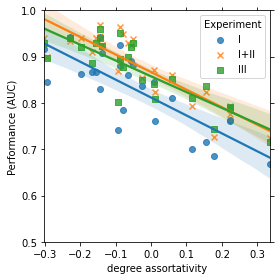

In [8]:
markers = ['o', 'x', 's']
with plt.rc_context(rc):
  for (experiment, df_experiment), marker in zip(df.groupby('experiment'), markers):
    sns.regplot(
      data=df_experiment, x='degree assortativity', y='auc', label=experiment,
      marker=marker)
  plt.legend(title='Experiment')
  plt.ylim(.5, 1)
  plt.ylabel('Performance (AUC)')
  plt.tight_layout()
  plt.savefig('code/figures/output/degree-assortativity.pdf')

In [9]:
df.replace({'experiment': {'time agnostic': 'Static topological', 'time aware': 'Temporal weighted topological'}}, inplace=True)
df.rename(columns={'experiment': 'Feature set used', 'auc': 'AUC', 'degree assortativity': 'Degree assortativity'}, inplace=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


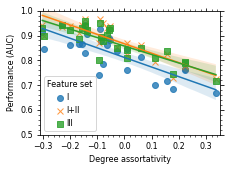

In [10]:
markers = ['o', 'x', 's']

fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,2.475), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
  'lines.linewidth': 1,
#   'lines.markersize': 4,
  'legend.handlelength': .1,
  'font.family': 'sans-serif',
  'font.sans-serif': 'Helvetica',
  'savefig.transparent': True
}

with plt.rc_context(rc):
  for (experiment, df_experiment), marker in zip(df.groupby('Feature set used'), markers):
    ax = sns.regplot(
      data=df_experiment, x='Degree assortativity', y='AUC', label=experiment,
      marker=marker)
  plt.legend(title='Feature set', loc='lower left')
  ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.02))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.02))
  ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
  ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
  ax.set_xlim(-.31, .35)
  plt.ylim(.5, 1)
  plt.ylabel('Performance (AUC)')
  plt.tight_layout()
  plt.savefig('code/figures/output/Fig5.pdf')

In [11]:
df_experiment['Degree assortativity'].agg(['min', 'max'])

min   -0.301404
max    0.335905
Name: Degree assortativity, dtype: float64

In [12]:
from scipy.stats.stats import pearsonr

In [14]:
df.columns

Index(['index', 'Degree assortativity', 'Feature set used', 'AUC'], dtype='object')

In [13]:
t = df[df['experiment'] == 'time agnostic']
pearsonr(t['degree assortativity'], t['auc'])

KeyError: 'experiment'

In [ ]:
t = df[df['experiment'] == 'time aware']
pearsonr(t['degree assortativity'], t['auc'])